In [3]:
%matplotlib inline
import seaborn as sns
sns.set()

In [4]:
import numpy as np
import matplotlib.pyplot as plt

This tutorial is based on example in Jake Vanderplas' PyCon 2015 tutorial.

#What is Machine Learning

Machine Learning is a subfield of computer science that utilizes statistics and mathemathical optimization to learn **generalizable patterns** from data. In machine learning, we develop models with **adjustable parameters**, so we can learn the parameters that best fit the data. In this tutorial, I will cover five commonly used algorithms in supervised learning.

## Iris Dataset

##The Iris dataset is a small dataset of 150 Iris flowers. For each data point we have the following features:
- 1.Sepal Length (cm)
- 2.Sepal Width (cm)
- 3.Petal Length (cm)
- 4.Petal Width (cm)

##We want to predict whether the Iris is of type:
- 1.Setosa
- 2.Vesicolor
- 3.Virginica

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

##For this example, we will only use the Sepal Length and Sepal Width feature, so we can plot the data in a 2D grid.

In [6]:
x_ind = 0
y_ind = 1

In [7]:
X = iris.data[:,(x_ind, y_ind)]
labels = iris.target

In [8]:
print X.shape
print labels.shape

(150, 2)
(150,)


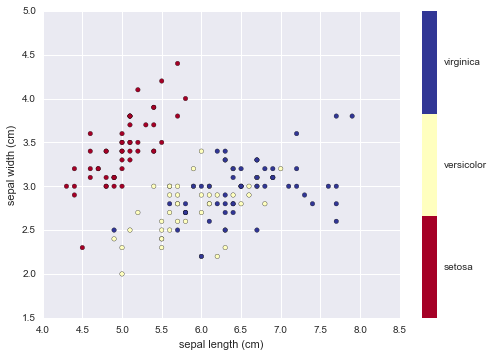

In [9]:
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(X[:, x_ind], X[:, y_ind],
            c=labels, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_ind])
plt.ylabel(iris.feature_names[y_ind]);

#K-Nearest Neighbors

In [10]:
from sklearn import neighbors

###Create a random sample of 25 data points

In [11]:
sample_size = 25
sample_size_zeroInd = sample_size - 1

In [12]:
rand_sample = np.random.randint(0,150, (sample_size,1))

In [13]:
x_sample = X[rand_sample].reshape((sample_size,2))
label_sample = labels[rand_sample]

###Let's look at a random sample of the Iris dataset. Suppose I were to ask you to classify the green dot as either red, yellow, or blue. What would you say?

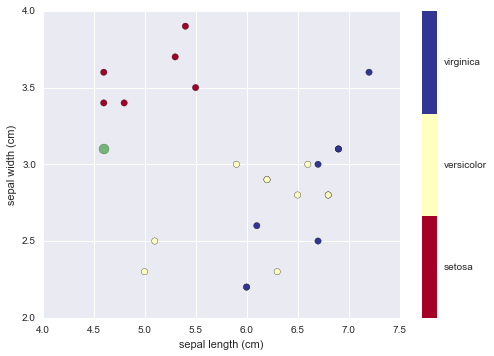

In [14]:
plt.scatter(x_sample[:sample_size_zeroInd, 0], x_sample[:sample_size_zeroInd, 1],
            c=label_sample[:sample_size_zeroInd], cmap=plt.cm.get_cmap('RdYlBu', 3), s = 40)
plt.colorbar(ticks=[0, 1, 2], format = formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_ind])
plt.ylabel(iris.feature_names[y_ind]);

plt.scatter(x_sample[sample_size_zeroInd, x_ind], x_sample[sample_size_zeroInd, y_ind], s = 100, c ='g', alpha = 0.5)

### Your intuition is that the green point will have a label similar to the points surrounding it. This is the idea behind the K-Nearest Neighbors algorithm.
- Start with test data point.
- Calculate distance between test point and all data points in the training set.
- Use the labels of the **k** closest points to assign a label to the test point.

In [15]:
n_neighbors = 13
h = 0.02

In [16]:
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=13, p=2, weights='uniform')

##We created a K-NN classifier that uses 13 neighbors to decide each test point. Let's see how it would label the space.

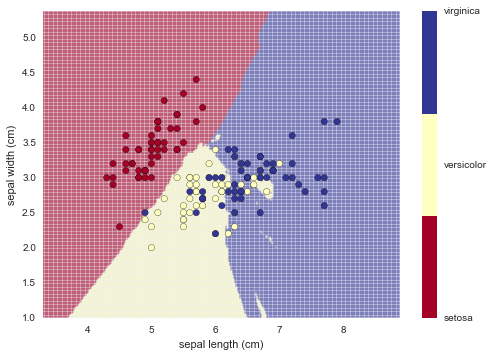

In [17]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.get_cmap('RdYlBu', 3), alpha = 0.2)

    # Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.get_cmap('RdYlBu', 3), s = 40)

plt.colorbar(ticks=[0, 1, 2], format = formatter)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(iris.feature_names[x_ind])
plt.ylabel(iris.feature_names[y_ind]);


##K-NN is easy to understand and implement, but because it requires us to test each new data point against each point in the training set, it is slow and scales poorly to larger datasets.

#Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

###Logistic Regression is the classification cousin of linear regression. In logistic regression, we predict the likelihood of a given label *y* based on our features.

In [19]:
clf = LogisticRegression(C=1e5)
clf.fit(X, labels)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, penalty='l2',
          random_state=None, tol=0.0001)

##Compared to KNN, we can create more concise decision boundaries for the data points.

([], <a list of 0 Text yticklabel objects>)

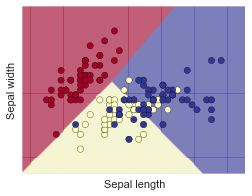

In [20]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.get_cmap('RdYlBu', 3), alpha = 0.2)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=labels, edgecolors='k', cmap=plt.cm.get_cmap('RdYlBu', 3), s = 40)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

##Logistic regression is quick and simple, but sometimes does not perform well due to the strict partitioning of the decision boundary.

#Support Vector Machines: Motivation

In [21]:
from IPython.display import Image

###Let's say we have red balls and blue balls on a table, and we want to separate them.

In [22]:
Image(url = 'http://i.imgur.com/zDBbD.png')

##Well, we can put a line down the middle that separates them.

In [23]:
Image(url ='http://i.imgur.com/aLZlG.png')

##But now if we add another red ball, the boundary does not hold

In [24]:
Image(url = 'http://i.imgur.com/kxWgh.png')

##Could this problem have been avoided? Is there a way to choose the line in the initial problem to prevent this?

##The answer is yes! If we choose a line that has a large margin, we can confidently label new data points.

In [25]:
Image(url ='http://i.imgur.com/ePy4V.png')

##Ta-Da!

In [26]:
Image(url ='http://i.imgur.com/BWYYZ.png')

##But let's say we have an arrangement of balls that no line can separate. What can we do?

In [27]:
Image(url = 'http://i.imgur.com/R9967.png')

##One of the big breakthroughs in machine learning is the kernel function. Using the kernel function, we can map the input data into a new feature space.

In [28]:
Image(url = 'http://i.imgur.com/WuxyO.png')

##After mapping our points to a higher dimensional space, we can map this line back down to our original space.

In [29]:
Image(url = 'http://i.imgur.com/gWdPX.png')

#Support Vector Machine: Example

In [30]:
from sklearn.datasets.samples_generator import make_blobs

###Let's create a new dataset

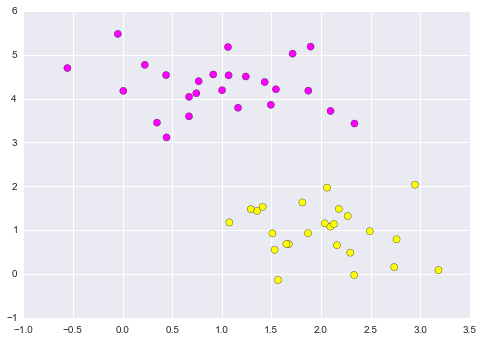

In [31]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');

### If we want to separate the two cluster of points with lines, there are several lines we can choose from. How would we determine which line is the *best* line.

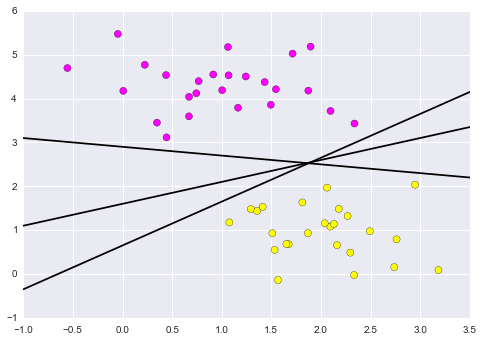

In [32]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

### Well... we can look at how big of margin each line has. The larger the margin, the more "confident" we are that the data is better separated.

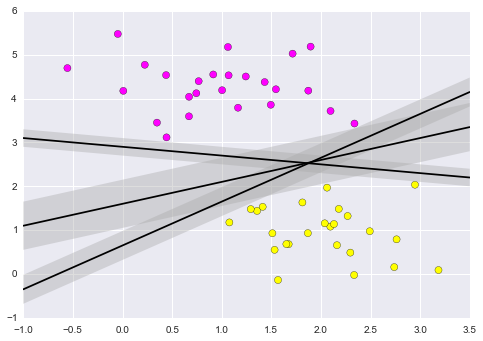

In [33]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

###Now, let's create a Support Vector Machine

In [34]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [35]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

### We can plot the decision boundary of the SVM along with its margin.

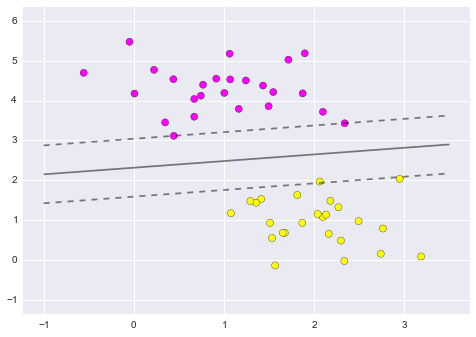

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

###Now, you may be wondering why this algorithm is called a Support Vector Machine. If you look back at the plot, you will notice there are three data points on the margin.

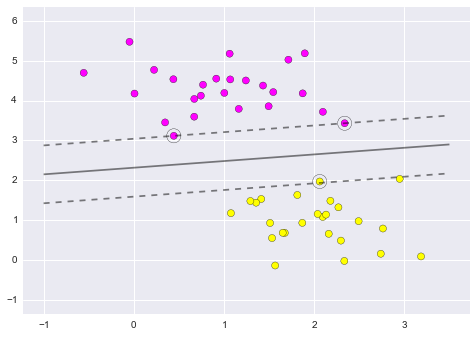

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

### These points are called the Support vectors. The support vectors are used by the algorithm to determine the margin boundary. Now, let's look at a more interactive demo.

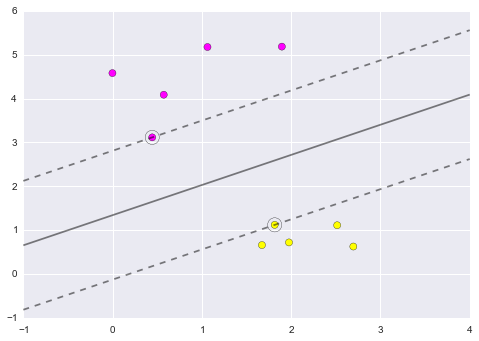

In [38]:
from IPython.html.widgets import interact

def plot_svm(N=10):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='none')
    
interact(plot_svm, N=[10, 200], kernel='linear');

###Let's look at a different dataset. In this dataset, it is obvious that the data points are not linearly separable.

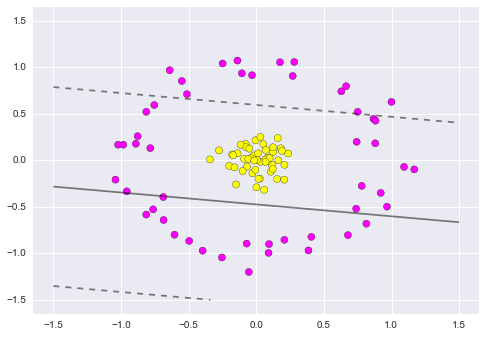

In [39]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

##We can use a kernel function to solve this problem



In [40]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

##Let's see what the data looks like in this higher dimensional space

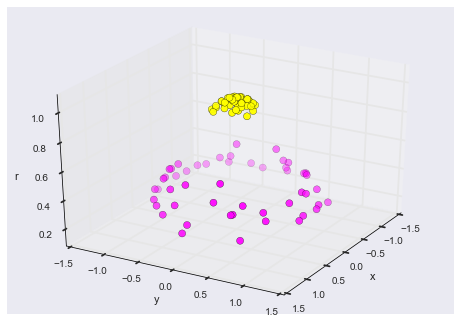

In [41]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180));

##Now, we can map this boundary back to our original space

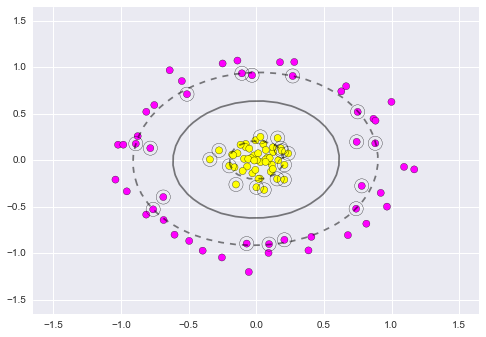

In [42]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

##SVMs are a mathematically beautiful algorithm that are guaranteed to find a wide margin decision boundary, but they do not perform well on large datasets due to scaling issues.

#Decision Trees

In [43]:
from sklearn.tree import DecisionTreeClassifier

##Decision Trees are commonly used by business analyst because they are easy to understand.

In [45]:
Image(url='http://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png')

##Let's create a more complex dataset

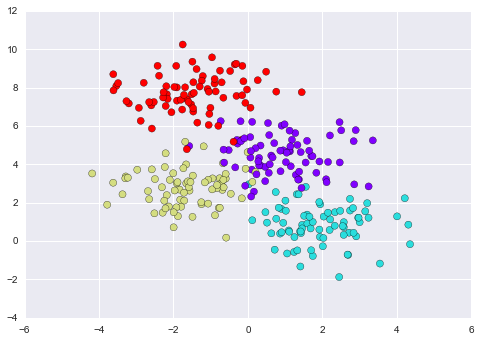

In [46]:
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

##Like the previous algorithms, the decision tree can partition up the space of points.

In [47]:
def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None):
    estimator.fit(X, y)

    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='rainbow')
    plt.clim(y.min(), y.max())

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
    plt.axis('off')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    plt.clim(y.min(), y.max())
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i < 0:
            return

        tree = estimator.tree_
        
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

##Notice how the boundaries of the decision tree are more form-fitting compared to the decision boundaries of our previous algorithms. One issue with decision trees is that they overfit to the data.

In [48]:
clf  = DecisionTreeClassifier()

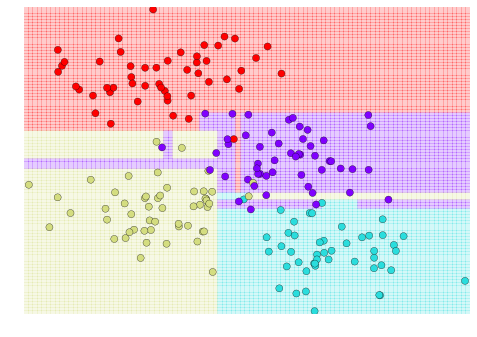

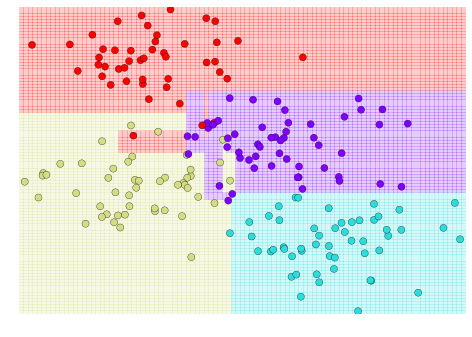

In [49]:
plt.figure()
visualize_tree(clf, X[:200], y[:200], boundaries=False)
plt.figure()
visualize_tree(clf, X[-200:], y[-200:], boundaries=False)

##The Decision Tree is easy to interpret, but if there are too many features, the tree may become too large very quickly.

#Random Forests

In [50]:
from sklearn.ensemble import RandomForestClassifier

##One Decision Tree is good, but what if we created a bunch of them and pooled their results together!

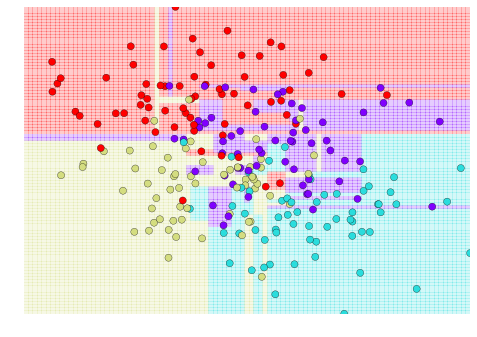

In [51]:
def fit_randomized_tree(random_state=0):
    X, y = make_blobs(n_samples=300, centers=4,
                      random_state=0, cluster_std=2.0)
    clf = DecisionTreeClassifier(max_depth=15)
    
    rng = np.random.RandomState(random_state)
    i = np.arange(len(y))
    rng.shuffle(i)
    visualize_tree(clf, X[i[:250]], y[i[:250]], boundaries=False,
                   xlim=(X[:, 0].min(), X[:, 0].max()),
                   ylim=(X[:, 1].min(), X[:, 1].max()))
    
from IPython.html.widgets import interact
interact(fit_randomized_tree, random_state=[0, 100]);

##That's the idea behind a random forest. Using a meta-heuristic known as the ensemble method, we can average the results of a group of over-fitted decision tree to create a random forest that has more generalizable results.

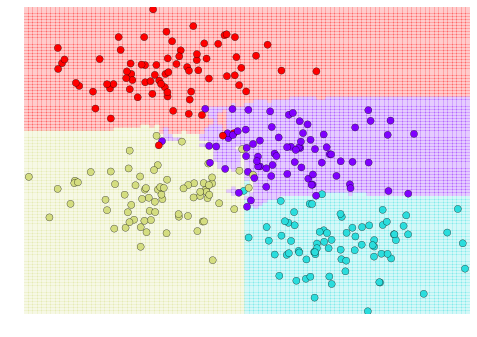

In [52]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_tree(clf, X, y, boundaries=False);

##In Data Science Competition websites like [Kaggle](www.kaggle.com) and [DrivenData](www.drivendata.org), Random Forests are commonly used and often achieve some of the best results.